<a href="https://colab.research.google.com/github/AdamZ0112358/values-fifa/blob/main/analysis/Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Data loading and merging

Final merging of datasets using previously developed keys

In [269]:
df = pd.read_excel(r'/content/drive/MyDrive/ColabNotebooks/mylib/final_df8.xlsx', index_col=(0))

In [270]:
df.head()

,klub,pilkarz,pozycja,data_urodzenia,wzrost,dominujaca_noga,kontrakt_od,kontrakt_do,wartosc_eur,liga,wiek,tf_klucz,ws_klucz,tf_klucz2,final_klucz,sf_unique_x
0,West Ham United,Aaron Cresswell,Lewy obrońca,15 gru 1989 (33),"1,70m",lewonożny,3 lip 2014,30 cze 2023,2500000.0,premier league,33,Cresswell33West Ham United,Cresswell33West Ham United,Cresswell (West Ham United),Cresswell (West Ham United),Aaron Cresswell32
1,FC Brentford,Aaron Hickey,Lewy obrońca,10 cze 2002 (20),"1,85m",obunożny,9 lip 2022,30 cze 2026,18000000.0,premier league,20,Hickey20FC Brentford,Hickey20FC Brentford,Hickey (FC Brentford),Hickey (FC Brentford),Aaron Hickey20
2,FC Arsenal,Aaron Ramsdale,Bramkarz,14 maj 1998 (24),"1,90m",prawonożny,20 sie 2021,30 cze 2025,30000000.0,premier league,24,Ramsdale24FC Arsenal,Ramsdale24FC Arsenal,Ramsdale (FC Arsenal),Ramsdale (FC Arsenal),Aaron Ramsdale24
3,OGC Nice,Aaron Ramsey,Środkowy pomocnik,26 gru 1990 (32),"1,78m",prawonożny,1 sie 2022,30 cze 2023,3000000.0,ligue 1,32,Ramsey32OGC Nice,Ramsey32OGC Nice,Ramsey (OGC Nice),Ramsey (OGC Nice),Aaron Ramsey31
4,Manchester United,Aaron Wan-Bissaka,Prawy obrońca,26 lis 1997 (25),"1,83m",prawonożny,1 lip 2019,30 cze 2024,18000000.0,premier league,25,Wan-Bissaka25Manchester United,Wan-Bissaka25Manchester United,Wan-Bissaka (Manchester United),Wan-Bissaka (Manchester United),Aaron Wan-Bissaka24


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126 entries, 0 to 3125
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   klub             3126 non-null   object
 1   pilkarz          3126 non-null   object
 2   pozycja          3126 non-null   object
 3   data_urodzenia   3126 non-null   object
 4   wzrost           3126 non-null   object
 5   dominujaca_noga  3126 non-null   object
 6   kontrakt_od      3126 non-null   object
 7   kontrakt_do      3126 non-null   object
 8   wartosc_eur      3126 non-null   object
 9   liga             3126 non-null   object
 10  wiek             3126 non-null   int64 
 11  tf_klucz         3126 non-null   object
 12  ws_klucz         2524 non-null   object
 13  tf_klucz2        3126 non-null   object
 14  final_klucz      2933 non-null   object
 15  sf_unique_x      2933 non-null   object
dtypes: int64(1), object(15)
memory usage: 415.2+ KB


In [272]:
sofifa_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/mylib/sf_df8.csv", index_col=(0))

In [273]:
df = pd.merge(df, sofifa_df, left_on=("sf_unique_x"), right_on=("sf_unique"), how="left")


In [274]:
df = df.drop(['tf_klucz', 'final_klucz', 'tf_klucz2','sf_unique_x', 'slownik_klub2', 'sf_klucz',
                    'sf_klucz2', 'sf_unique'], axis = 1)

In [275]:
ws_df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/mylib/ws5_df.xlsx", index_col=(0))

In [276]:
df = pd.merge(df, ws_df[{"ws_wystepy", "ws_minuty", "ws_bramki", "ws_asysty", "ws_skutecznosc_podan",
                        "ws_wygrane_pojedynki_na_mecz", "ws_MotM", "ws_srednia_ocena", "ws_klucz" }],
              left_on=("ws_klucz"), right_on=("ws_klucz"), how="left")

Let's translate columns to English

In [277]:
df.columns

Index(['klub', 'pilkarz', 'pozycja', 'data_urodzenia', 'wzrost',
       'dominujaca_noga', 'kontrakt_od', 'kontrakt_do', 'wartosc_eur', 'liga',
       'wiek', 'ws_klucz', 'NAME', 'POSITIONS', 'OVA', 'POT', 'TEAM',
       'CONTRACT_LENGTH', 'ATTACKING', 'SKILL', 'MOVEMENT', 'POWER',
       'MENTALITY', 'DEFENDING', 'TOTAL', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY', 'FULL_NAME', 'AGE', 'VALUE_EUR', 'SALARY_EUR', 'ws_MotM',
       'ws_wystepy', 'ws_bramki', 'ws_minuty', 'ws_wygrane_pojedynki_na_mecz',
       'ws_srednia_ocena', 'ws_asysty', 'ws_skutecznosc_podan'],
      dtype='object')

In [278]:
english_columns = ['club', 'footballer', 'position', 'birth_date', 'height',
       'dominant_leg', 'contract_start', 'contract_end', 'tf_value_eur', 'league',
       'age', 'ws_key', 'NAME', 'POSITIONS', 'OVA', 'POT', 'TEAM',
       'CONTRACT_LENGTH', 'ATTACKING', 'SKILL', 'MOVEMENT', 'POWER',
       'MENTALITY', 'DEFENDING', 'TOTAL', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY', 'FULL_NAME', 'AGE', 'VALUE_EUR', 'sf_SALARY_EUR', 'ws_MotM',
       'ws_appearances',  'ws_goals', 'ws_minutes', 'duels_won_per_game',
       'ws_average_rating', 'ws_assists', 'ws_pass_effectivenes']

In [279]:
df.columns = english_columns

# Explanatory Data Analysis

First look at the merged data

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126 entries, 0 to 3125
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   club                  3126 non-null   object 
 1   footballer            3126 non-null   object 
 2   position              3126 non-null   object 
 3   birth_date            3126 non-null   object 
 4   height                3126 non-null   object 
 5   dominant_leg          3126 non-null   object 
 6   contract_start        3126 non-null   object 
 7   contract_end          3126 non-null   object 
 8   tf_value_eur          3126 non-null   object 
 9   league                3126 non-null   object 
 10  age                   3126 non-null   int64  
 11  ws_key                2524 non-null   object 
 12  NAME                  2933 non-null   object 
 13  POSITIONS             2933 non-null   object 
 14  OVA                   2933 non-null   float64
 15  POT                  

As can be seen above, some variables have the wrong type assigned.

In [281]:
ws_null = df["ws_key"].isna().sum()
sf_null = df["TOTAL"].isna().sum()

shared_null = ((df["ws_key"].isna()) & (df["TOTAL"].isna())).sum()
shared_null_percent = (shared_null/df['footballer'].count()) * 100

both_null = ws_null + sf_null - shared_null
both_null_percent = (both_null/df['footballer'].count()) * 100

print("{} rows from who_scored are nulls, {} rows from sofia are nulls. Missing data in both columns at the same time applies to {} rows - that equals {:.2f}% .".format(ws_null, sf_null, shared_null, shared_null_percent))
print("If I wanted to throw away all the nulls ({}) I would have to get rid of {:.2f}% of the data ".format(both_null, both_null_percent))



602 rows from who_scored are nulls, 193 rows from sofia are nulls. Missing data in both columns at the same time applies to 136 rows - that equals 4.35% .
If I wanted to throw away all the nulls (659) I would have to get rid of 21.08% of the data 


In [282]:
df = df.drop(['ws_key'], axis = 1)

Below you can see the breakdown of data gaps per variable.

In [283]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data["Total"]>0])

                      Total  Percent
ws_pass_effectivenes    602     0.19
ws_assists              602     0.19
ws_average_rating       602     0.19
duels_won_per_game      602     0.19
ws_minutes              602     0.19
ws_goals                602     0.19
ws_appearances          602     0.19
ws_MotM                 602     0.19
DEF                     193     0.06
PAC                     193     0.06
SHO                     193     0.06
PAS                     193     0.06
DRI                     193     0.06
VALUE_EUR               193     0.06
PHY                     193     0.06
FULL_NAME               193     0.06
AGE                     193     0.06
DEFENDING               193     0.06
sf_SALARY_EUR           193     0.06
TOTAL                   193     0.06
MENTALITY               193     0.06
NAME                    193     0.06
MOVEMENT                193     0.06
SKILL                   193     0.06
ATTACKING               193     0.06
CONTRACT_LENGTH         193     0.06
T

In [284]:
df.describe()

,age,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,AGE,VALUE_EUR,sf_SALARY_EUR,ws_minutes,ws_average_rating
count,"3,126.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,524.00","2,524.00"
mean,25.80,73.13,77.65,278.36,290.96,333.51,318.39,283.10,159.28,"1,750.11",70.36,60.13,65.40,70.24,56.71,68.87,25.44,"10,521,244.46","44,184.79",727.96,6.53
std,4.56,6.31,5.26,83.32,86.36,58.87,53.20,72.69,68.74,292.22,10.98,14.31,9.44,9.01,17.93,9.35,4.52,"16,042,937.99","99,050.56",481.87,0.33
min,16.00,48.00,58.00,45.00,55.00,132.00,144.00,65.00,23.00,806.00,30.00,22.00,31.00,36.00,16.00,30.00,16.00,0.00,"1,000.00",1.00,5.66
25%,22.00,69.00,74.00,254.00,261.00,302.00,289.00,260.00,95.00,"1,622.00",64.00,50.00,59.00,65.00,41.00,63.00,22.00,"1,900,000.00","8,000.00",289.00,6.29
50%,25.00,74.00,78.00,299.00,311.00,344.00,328.00,298.00,188.00,"1,804.00",71.00,63.00,66.00,71.00,62.00,70.00,25.00,"4,100,000.00","21,000.00",710.50,6.51
75%,29.00,77.00,81.00,334.00,349.00,375.00,357.00,331.00,217.00,"1,949.00",78.00,71.00,72.00,76.00,72.00,76.00,29.00,"12,000,000.00","42,000.00","1,116.00",6.72
max,41.00,91.00,95.00,434.00,464.00,461.00,432.00,414.00,268.00,"2,312.00",97.00,91.00,93.00,94.00,90.00,90.00,41.00,"190,500,000.00","950,000.00","1,798.00",8.45


In [285]:
df[df.columns[df.dtypes == object]].describe()


,club,footballer,position,birth_date,height,dominant_leg,contract_start,contract_end,tf_value_eur,league,NAME,POSITIONS,TEAM,CONTRACT_LENGTH,FULL_NAME,ws_MotM,ws_appearances,ws_goals,duels_won_per_game,ws_assists,ws_pass_effectivenes
count,3126,3126,3126,3126,3126,3126,3126,3126,3126,3126,2933,2933,2933,2933,2933,2524,2524,2524,2524,2524,2524
unique,116,3106,13,2404,41,4,576,14,104,6,2901,328,116,78,2933,7,193,16,51,11,416
top,AC Monza,Antony,Środkowy obrońca,9 lut 1995 (27),"1,85m",prawonożny,1 lip 2022,30 cze 2023,3000000.0,serie a,M. Camara,CB,Monza,"Jun 30, 2023",Aaron Cresswell,-,15,-,-,-,80
freq,36,2,555,5,216,2166,442,856,156,582,3,423,33,230,1,1902,90,1512,280,1598,30


A first look at the basic statistics of numeric and categorical variables. As you can see, some variables are assigned the wrong type (e.g. height, value)

In [286]:
#removing unnecessary columns, including duplicate columns
df = df.drop(['birth_date', 'contract_start', 'contract_end',
              'NAME', 'TEAM', 'CONTRACT_LENGTH', 'FULL_NAME', 'AGE'], axis = 1)

## Value - target variable

The variable 'tf_value_eur' needs to be fixed.

In [287]:
df['tf_value_eur'] = df['tf_value_eur'].astype("string")
df['tf_value_eur'] = df['tf_value_eur'].str.replace('-','0')
df['tf_value_eur'] = df["tf_value_eur"].astype("float")


Let's define a function to easily get a view and information about a given variable

In [288]:
def plots_stats(col, name):
    fig, axs = plt.subplots(2, 1, figsize=(12,6))

    #(displot)
    sns.histplot(col, ax=axs[0], kde=True)
    axs[0].set_xlabel(name)
    axs[0].set_title("Distribution of the '" + name + "'")


    #(boxplot)
    sns.boxplot(col, ax=axs[1], orient='h')
    axs[1].set_xlabel(name)
    axs[1].set_title("Boxplot of the '" + name + "'")

    # Change of axis format on x-axis for both graphs
    axs[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


    plt.tight_layout()
    plt.show()

    print(f"skewness: {col.skew():.2f}")
    print(f"kurtosis: {col.kurt():.2f}")

    display(col.describe())

Let's take a closer look at the value

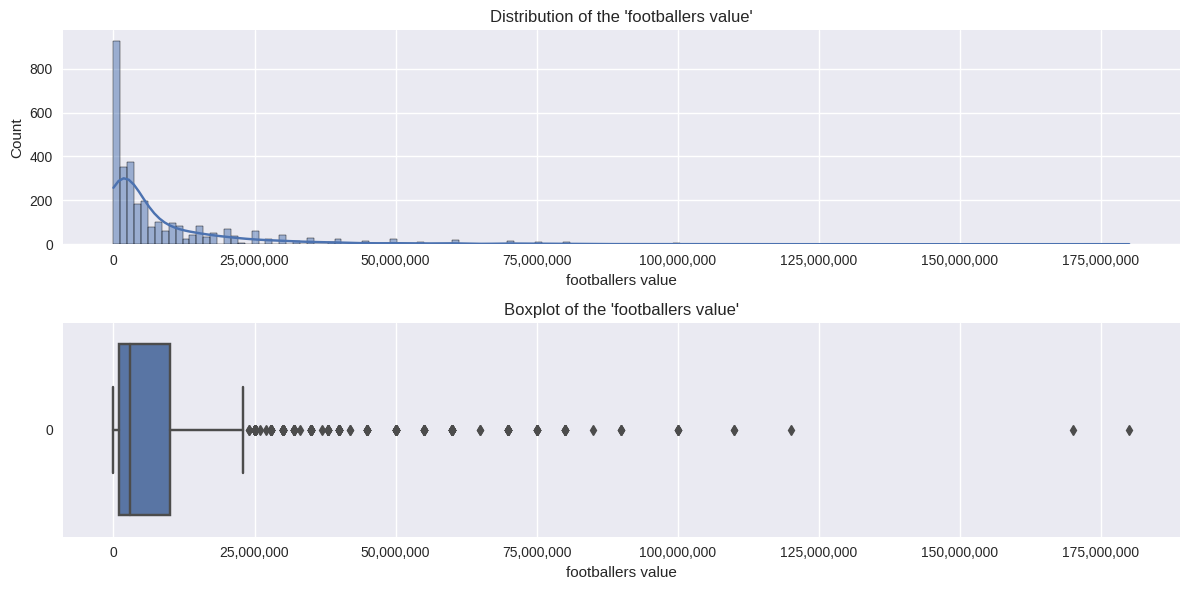

skewness: 3.64
kurtosis: 20.24


count         3,126.00
mean      8,938,515.67
std      14,635,060.56
min               0.00
25%       1,000,000.00
50%       3,000,000.00
75%      10,000,000.00
max     180,000,000.00
Name: tf_value_eur, dtype: float64

In [289]:
plots_stats(df["tf_value_eur"], "footballers value")

As you can see from the graph, the distribution is not normal. The long tail on the right and significant outliers are also confirmed by skewness and kurtosis
<br>
75% of the analyzed players are cheaper than 1 million eur,
The average price is 8.9 million eur <br>
The value of 0 seems odd





In [290]:
print((df['tf_value_eur'] == 0).sum())
df[df['tf_value_eur'] == 0]

15


,club,footballer,position,height,dominant_leg,tf_value_eur,league,age,POSITIONS,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,sf_SALARY_EUR,ws_MotM,ws_appearances,ws_goals,ws_minutes,duels_won_per_game,ws_average_rating,ws_assists,ws_pass_effectivenes
262,Bayern Monachium,Arijon Ibrahimovic,Ofensywny pomocnik,"1,76m",prawonożny,0.00,bundesliga,17,CAM LM,59.00,80.00,294.00,293.00,305.00,261.00,252.00,70.00,"1,527.00",59.00,62.00,56.00,63.00,26.00,46.00,"700,000.00","1,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Manchester City,Benjamin Mendy,Lewy obrońca,"1,85m",lewonożny,0.00,premier league,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,1.FSV Mainz 05,Brajan Gruda,Prawy napastnik,-,lewonożny,0.00,bundesliga,18,RW ST CAM,59.00,77.00,280.00,293.00,323.00,288.00,232.00,72.00,"1,538.00",67.00,63.00,53.00,63.00,28.00,49.00,"575,000.00","2,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,OGC Nice,Daouda Traore,Prawy pomocnik,"1,86m",,0.00,ligue 1,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,GD Chaves,Guilherme,Środkowy obrońca,"1,91m",lewonożny,0.00,liga nos,22,CB,61.00,67.00,202.00,155.00,265.00,277.00,241.00,196.00,"1,390.00",55.00,36.00,36.00,36.00,64.00,67.00,"475,000.00","1,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137,FC Paris Saint-Germain,Ilyes Housni,Środkowy napastnik,"1,72m",prawonożny,0.00,ligue 1,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,Gil Vicente FC,Marlon,Lewy napastnik,"1,76m",prawonożny,0.00,liga nos,25,RW LW,60.00,62.00,284.00,266.00,331.00,255.00,207.00,86.00,"1,491.00",68.00,63.00,48.00,67.00,28.00,41.00,"325,000.00","2,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,Manchester United,Mason Greenwood,Prawy napastnik,"1,81m",obunożny,0.00,premier league,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2163,Eintracht Frankfurt,Nacho Ferri,Środkowy napastnik,"1,92m",prawonożny,0.00,bundesliga,18,ST,61.00,80.00,285.00,231.00,310.00,309.00,216.00,64.00,"1,463.00",73.00,63.00,47.00,55.00,25.00,61.00,"825,000.00","950,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,FC Bologna,Orji Okwonkwo,Prawy napastnik,"1,80m",prawonożny,0.00,serie a,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are footballers who are excluded from clubs for various reasons (such as legal proceedings against them). I will remove them from the data set, as there are only 15 of them

In [291]:
df = df[df.tf_value_eur != 0]

Let's see who is worth 0 according to fifa's valuation

In [292]:
print((df['VALUE_EUR'] == 0).sum())
df[df['VALUE_EUR'] == 0]

2


,club,footballer,position,height,dominant_leg,tf_value_eur,league,age,POSITIONS,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,sf_SALARY_EUR,ws_MotM,ws_appearances,ws_goals,ws_minutes,duels_won_per_game,ws_average_rating,ws_assists,ws_pass_effectivenes
1307,Real Betis Balompié,Joaquin,Prawy napastnik,"1,81m",prawonożny,"1,500,000.00",laliga,41,RM LM CAM,79.00,79.00,383.00,411.00,350.00,280.00,331.00,127.00,"1,932.00",65.00,77.00,85.00,80.00,44.00,51.00,0.00,"20,000.00",-,1(5),-,162.00,-,6.48,1,87.8
3087,AC Milan,Zlatan Ibrahimovic,Środkowy napastnik,"1,95m",prawonożny,"2,000,000.00",serie a,41,ST,82.00,82.00,401.00,385.00,311.00,367.00,355.00,89.00,"1,967.00",58.00,85.00,76.00,77.00,34.00,72.00,0.00,"63,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's transform the value using the logarithm. This will make the outliers less significant

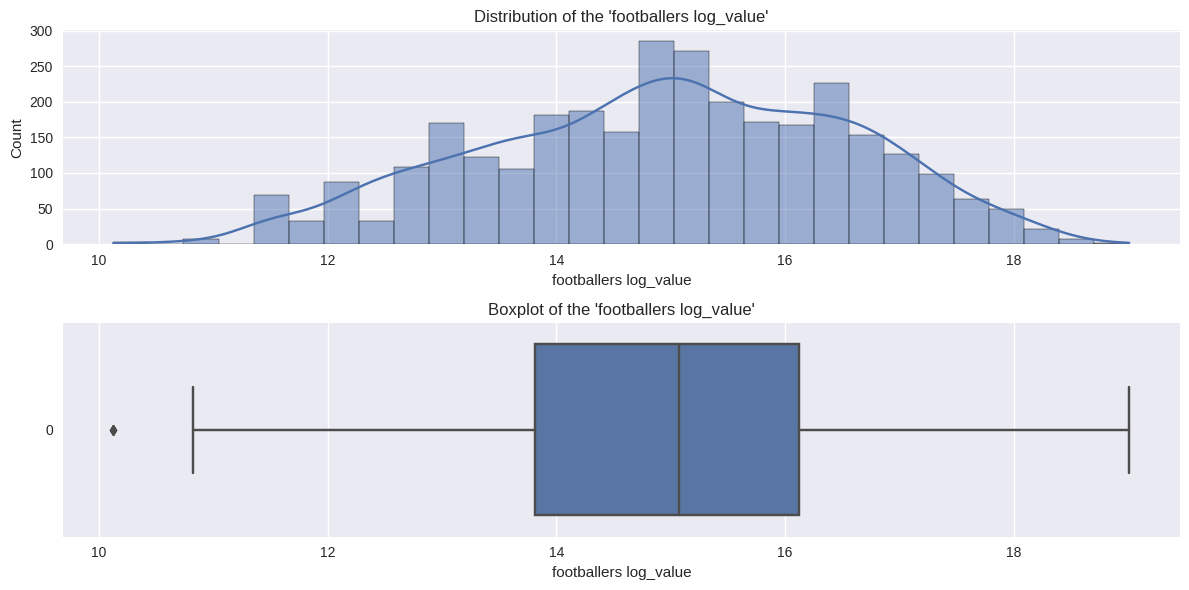

skewness: -0.18
kurtosis: -0.59


count   3,111.00
mean       14.94
std         1.60
min        10.13
25%        13.82
50%        15.07
75%        16.12
max        19.01
Name: value_log, dtype: float64

In [293]:
df['value_log'] = np.log(df['tf_value_eur'])
plots_stats(df["value_log"], "footballers log_value")

This looks much better. After the transformation, the data distribution more closely resembles a normal distribution

Let's see how the price breaks down by determined baskets:

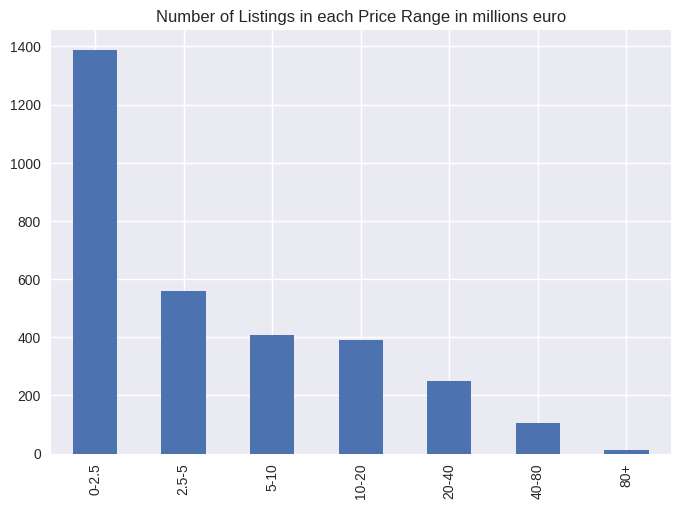

In [294]:
plt.style.use("seaborn")
price_range = pd.cut(df["tf_value_eur"],
                     bins=[0, 2500000, 5000000, 10000000, 20000000, 40000000, 80000000, df["tf_value_eur"].max()],
                     labels=["0-2.5", "2.5-5", "5-10", "10-20", "20-40", "40-80", "80+"])
df["price_range"] = price_range
df["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range in millions euro")
plt.show()


Most players are included in the basket up to €2.5 million

In [295]:
#The 10 most expensive players
top10 = df[["footballer", "tf_value_eur", "club", "VALUE_EUR"]].sort_values(by="tf_value_eur", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

           footballer   tf_value_eur                    club      VALUE_EUR
1       Kylian Mbappe 180,000,000.00  FC Paris Saint-Germain 190,500,000.00
2      Erling Haaland 170,000,000.00         Manchester City 160,000,000.00
3     Vinicius Junior 120,000,000.00             Real Madryt 109,000,000.00
4     Jude Bellingham 110,000,000.00       Borussia Dortmund  81,500,000.00
5          Phil Foden 110,000,000.00         Manchester City 109,500,000.00
6   Federico Valverde 100,000,000.00             Real Madryt  81,000,000.00
7       Jamal Musiala 100,000,000.00        Bayern Monachium  78,500,000.00
8         Bukayo Saka 100,000,000.00              FC Arsenal  72,000,000.00
9               Pedri 100,000,000.00            FC Barcelona 104,500,000.00
10         Harry Kane  90,000,000.00       Tottenham Hotspur 105,500,000.00


In [296]:
#The 10 most expensive but values from fifa
top10 = df[["footballer", "VALUE_EUR", "club", "tf_value_eur"]].sort_values(by="VALUE_EUR", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

         footballer      VALUE_EUR                    club   tf_value_eur
1     Kylian Mbappe 190,500,000.00  FC Paris Saint-Germain 180,000,000.00
2    Erling Haaland 160,000,000.00         Manchester City 170,000,000.00
3   Frenkie de Jong 116,500,000.00            FC Barcelona  50,000,000.00
4     Mohamed Salah 115,500,000.00            FC Liverpool  80,000,000.00
5        Phil Foden 109,500,000.00         Manchester City 110,000,000.00
6   Vinicius Junior 109,000,000.00             Real Madryt 120,000,000.00
7        Ruben Dias 107,500,000.00         Manchester City  75,000,000.00
8   Kevin De Bruyne 107,500,000.00         Manchester City  80,000,000.00
9    Joshua Kimmich 105,500,000.00        Bayern Monachium  80,000,000.00
10       Harry Kane 105,500,000.00       Tottenham Hotspur  90,000,000.00


As you can see, the value of the players according to transfermarkt differs slightly from those according to fifa.

In [297]:
#The 10 best rated footballers from fifa
top10 = df[["footballer", "OVA", "club"]].sort_values(by="OVA", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

            footballer   OVA                    club
1   Robert Lewandowski 91.00            FC Barcelona
2        Karim Benzema 91.00             Real Madryt
3        Kylian Mbappe 91.00  FC Paris Saint-Germain
4         Lionel Messi 91.00  FC Paris Saint-Germain
5      Kevin De Bruyne 91.00         Manchester City
6        Mohamed Salah 90.00            FC Liverpool
7     Thibaut Courtois 90.00             Real Madryt
8           Harry Kane 89.00       Tottenham Hotspur
9      Virgil van Dijk 89.00            FC Liverpool
10           Jan Oblak 89.00         Atlético Madryt


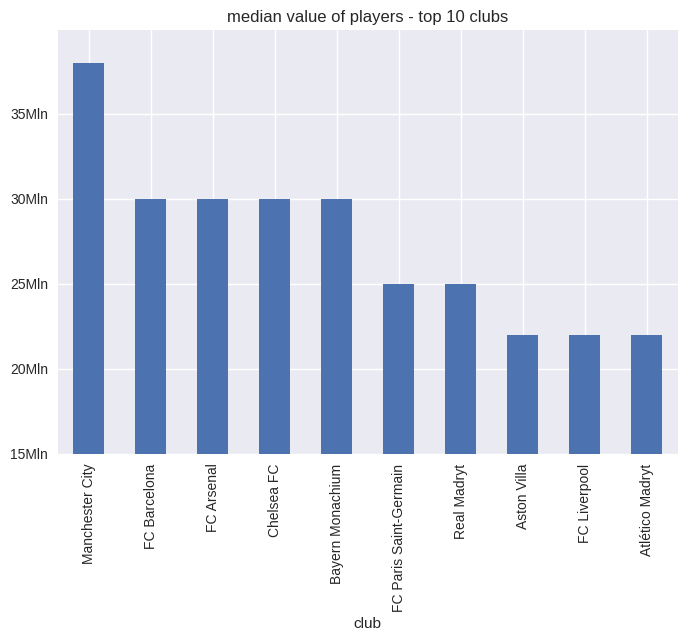

In [298]:
club_median_price = df.groupby(['club'])['tf_value_eur'].median().sort_values(ascending=False).head(10)
ax = club_median_price.plot.bar(x='club', y='tf_value_eur')
ax.set_title("median value of players - top 10 clubs")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,g}'.format(y/1000000) + 'Mln'))
ax.set_ybound(lower=15000000, upper=None)
plt.show()

Manchaster City has the highest median value of its players

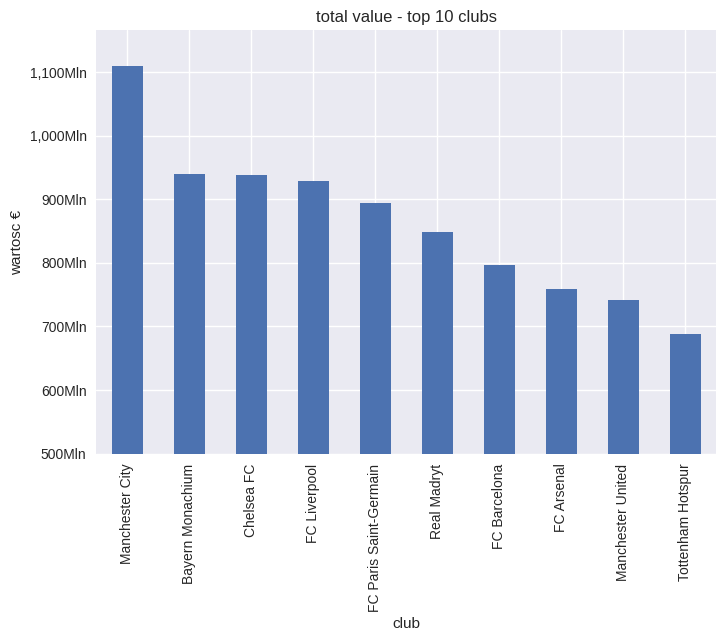

In [299]:
club_sum_price = df.groupby(['club'])['tf_value_eur'].sum().sort_values(ascending=False).head(10)
ax = club_sum_price.plot.bar(x='club', y='tf_value_eur')
ax.set_title("total value - top 10 clubs")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,g}'.format(y/1000000) + 'Mln'))
ax.set_ybound(lower=500000000, upper=None)
ax.set_ylabel("wartosc €", fontdict=None, labelpad=None)
plt.show()

Overall, Manchester City also has the highest value of players

## height

Let's look at the 'growth' feature, it probably won't be relevant in terms of value, but let's see.<br>
Let's fix the feature first.

In [300]:
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str.replace('m','')
df['height'] = df['height'].str.replace('-','0')
df['height'] = df['height'].astype(float)

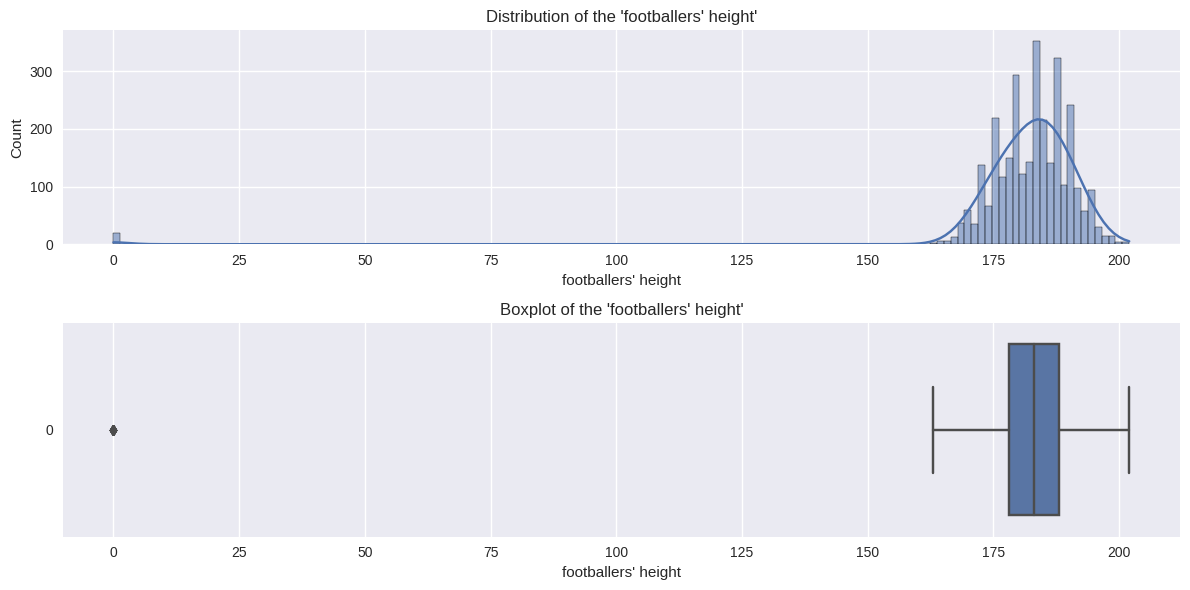

skewness: -9.36
kurtosis: 105.53


count   3,111.00
mean      181.76
std        15.75
min         0.00
25%       178.00
50%       183.00
75%       188.00
max       202.00
Name: height, dtype: float64

In [301]:
plots_stats(df["height"], "footballers' height")

As we can see on the graph there is long tail on the left side, which is confirmed by skewness. The majority of the data points are concentrated towards the right side of the distribution. Kurtosis value of 105.53 suggests that the data distribution has more outliers and extreme points than normal distribution.

Let's define a function so we can easily look at the relationship between variables and the value of the players

In [302]:
def plot_scatter_with_line(df, x_variable, y_variable, line=True):


    plt.scatter(df[x_variable], df[y_variable], alpha=0.2)

    if line:
      z = np.polyfit(df[x_variable], df[y_variable], 1)
      p = np.poly1d(z)
      plt.plot(df[x_variable], p(df[x_variable]))

    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title("'{}' vs '{}'".format(x_variable, y_variable))


    correlation = stats.pearsonr(df[y_variable], df[x_variable])
    print(("\033[1mPearson's\033[0m correlation coefficient between \033[1m{}\033[0m and \033[1m{}\033[0m is \033[1m{:.4f}\033[0m and \033[1mp-value {:.2f}\033[0m."
           ).format(x_variable, y_variable, correlation[0], correlation[1]))

    plt.show()

Pearson's correlation coefficient between height and value_log is 0.0927 and p-value 0.00.


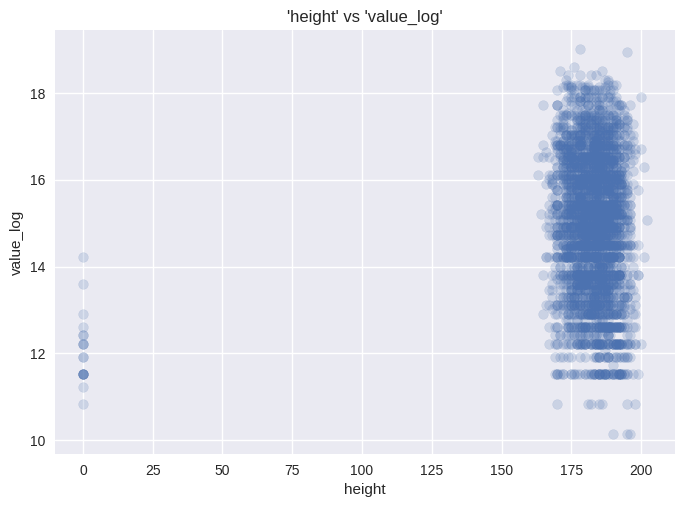

In [303]:
plot_scatter_with_line(df, 'height', 'value_log', line=False)

Footballers' height has weak positive linear correlation, but I won't use this feature.

## Age

Let's look at the age.<br>
At first let's look ate the distribution.

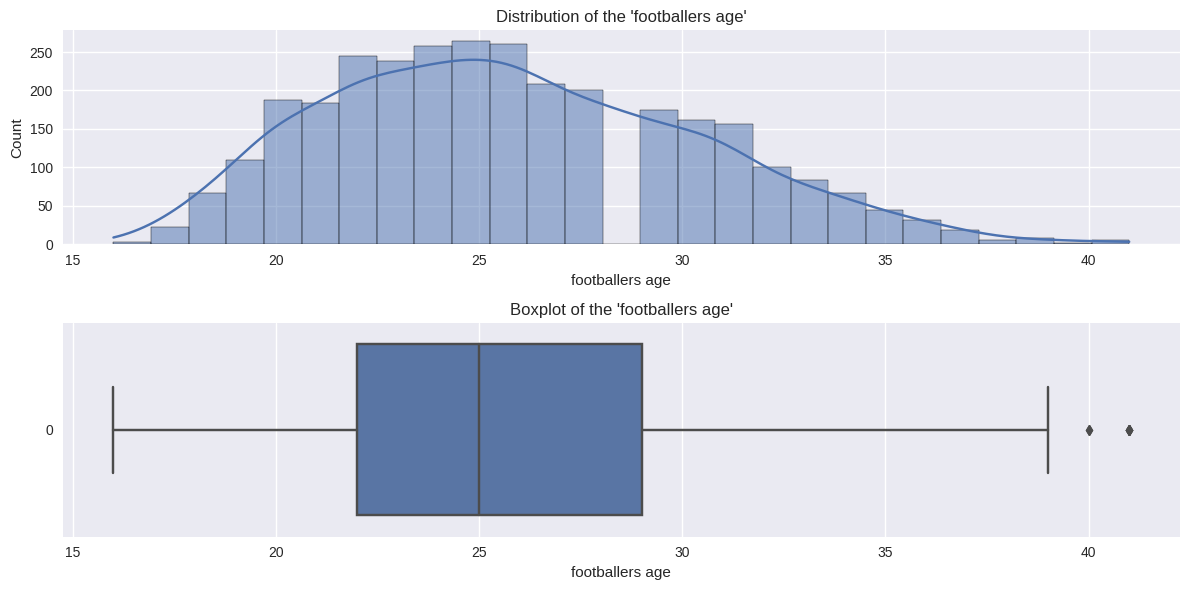

skewness: 0.41
kurtosis: -0.29


count   3,111.00
mean       25.82
std         4.55
min        16.00
25%        22.00
50%        25.00
75%        29.00
max        41.00
Name: age, dtype: float64

In [304]:
plots_stats(df["age"], "footballers age")

Distribution appears to be close to normal, slightly skewed to the right.
<br> Let's look at the correlation with value.

Pearson's correlation coefficient between age and value_log is -0.0054 and p-value 0.76.


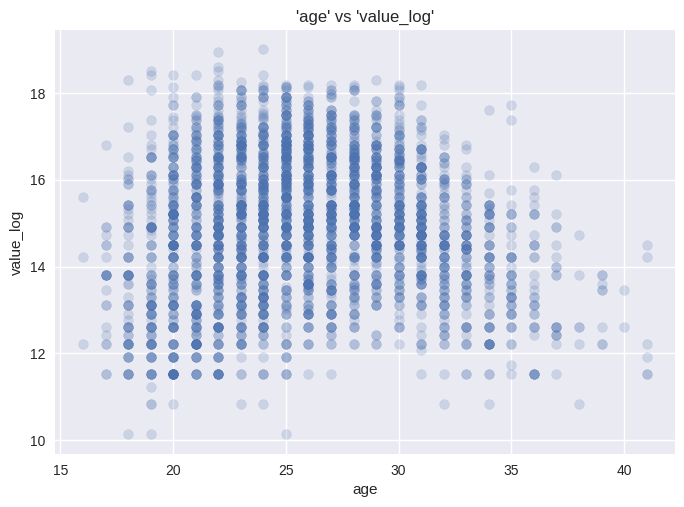

In [305]:
plot_scatter_with_line(df, 'age', 'value_log', line=False)

The value of footballers seems to increase with age until around 30 years of age, after which it decreases.
Although the Pearson correlation coefficient is low and the p-value rejects the null hypothesis, I believe the variable may be useful.

## positions

Let's look at the position on the pitch. <br>
We have two variables that show positions, let's compare them.

In [306]:
df["POSITIONS"].unique()

array(['LB CB ', 'RB LB RWB ', 'GK ', 'CM CAM ', 'RB ', 'LB LM ', nan,
       'CDM CM ', 'RM ST ', 'LM RM LW ', 'CAM CM LM ', 'CB LB ',
       'CDM CM RM ', 'RB RWB LB ', 'CM CDM ', 'LWB LB ', 'CB ', 'ST LM ',
       'ST ', 'RB RWB ', 'LW ST CAM ', 'CAM LM ST ', 'CM CF CDM ',
       'LB RB ', 'LWB LM LB ', 'RW ST RM ', 'LM RM ', 'LM CAM CM ',
       'RW LW ', 'ST LW ', 'CB CDM ', 'CM LM ', 'LB ', 'ST RM ',
       'RM LM ST ', 'LB LWB ', 'LB RB LWB ', 'ST CAM CM ', 'RWB CM RB ',
       'RM LM RB ', 'CM RM CF ', 'ST CAM ', 'RM ', 'CF LM ', 'RM RB ',
       'CAM ', 'LB LM RB ', 'LW LM ', 'LB LWB LM ', 'RB RM RWB ',
       'LM RM CAM ', 'CF CAM ', 'CM ', 'LW ', 'CB RB ', 'CAM CM RM ',
       'CM RW CDM ', 'RB RM ', 'CB RB CDM ', 'ST CF ', 'LM ST ',
       'CDM CM CB ', 'CM LM LW ', 'RM LM CAM ', 'RW RM ', 'CB RB LB ',
       'LM LW ', 'CB RWB ', 'CM CDM RM ', 'LM ST RM ', 'LM CAM ',
       'LW RW ', 'LWB LM RWB ', 'RWB RB ', 'CAM CM ', 'ST RW LW ', 'CDM ',
       'ST RM CAM ', 'LWB LM ', '

In [307]:
df["position"].unique()

array(['Lewy obrońca', 'Bramkarz', 'Środkowy pomocnik', 'Prawy obrońca',
       'Prawy napastnik', 'Lewy napastnik', 'Ofensywny pomocnik',
       'Środkowy obrońca', 'Defensywny pomocnik', 'Środkowy napastnik',
       'Prawy pomocnik', 'Cofnięty napastnik', 'Lewy pomocnik'],
      dtype=object)

'position' from the tranfermarkt set seems better. Let's extract information from it that might be useful and then change the names to English.

In [308]:
df = df.drop(['POSITIONS'], axis = 1)

Let's group positions into fewer categories<br>
It looks like last word will do the trick

In [309]:
df["position_grouped"] = df["position"].str.split().str[-1]
df["position_grouped"].unique()

array(['obrońca', 'Bramkarz', 'pomocnik', 'napastnik'], dtype=object)

In [310]:
translation_dict = {
    'obrońca': 'defender',
    'Bramkarz': 'goalkeeper',
    'pomocnik': 'midfielder',
    'napastnik': 'forward'
}
df['position_grouped'] = df['position_grouped'].map(translation_dict)

In [311]:
translation_dict2 = {
    'Lewy obrońca': 'Left defender',
    'Bramkarz': 'Goalkeeper',
    'Środkowy pomocnik': 'Central midfielder',
    'Prawy obrońca': 'Right defender',
    'Prawy napastnik': 'Right forward',
    'Lewy napastnik': 'Left forward',
    'Ofensywny pomocnik': 'Attacking midfielder',
    'Środkowy obrońca': 'Central defender',
    'Defensywny pomocnik': 'Defensive midfielder',
    'Środkowy napastnik': 'Central forward',
    'Prawy pomocnik': 'Right midfielder',
    'Cofnięty napastnik': 'Withdrawn forward',
    'Lewy pomocnik': 'Left midfielder'
}
df['position'] = df['position'].map(translation_dict2)


<Axes: title={'center': 'Distribution of players in relation to their position on the pitch.'}, ylabel='position'>

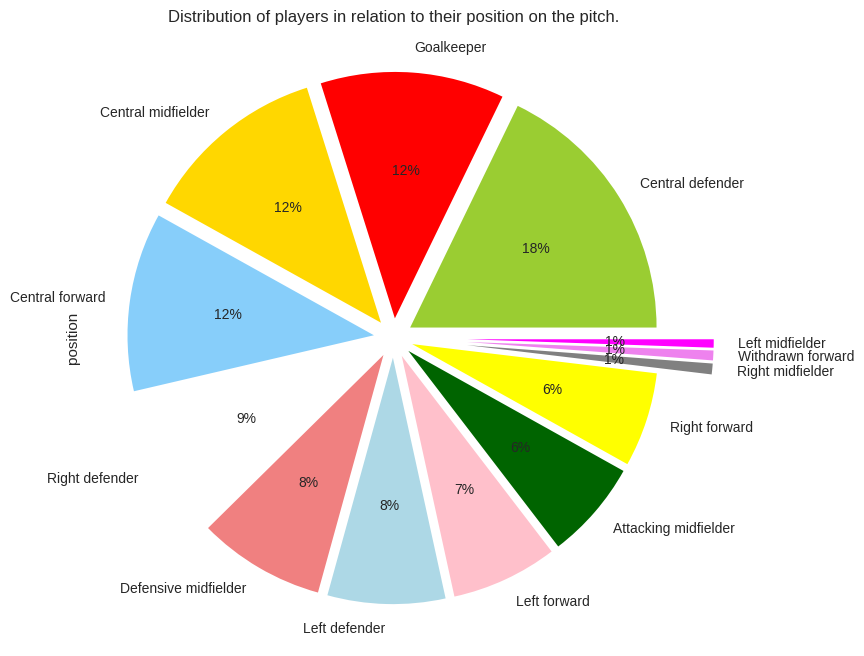

In [312]:
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue','white','lightcoral','lightblue','pink', 'darkgreen',
          'yellow','grey','violet','magenta']
explode = (0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.3, 0.3, 0.3)
df.position.value_counts().plot(title = "Distribution of players in relation to their position on the pitch.",
                               kind='pie', autopct='%1.0f%%', explode = explode, colors=colors, figsize=(8, 8))


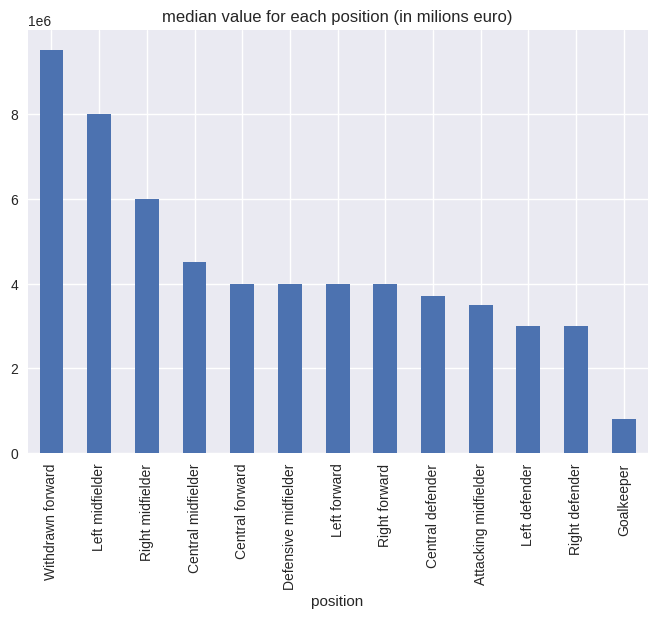

In [313]:
position_md_price = (df.groupby(['position'])['tf_value_eur'].median()).sort_values(ascending=False)
position_md_price.plot(kind="bar")
plt.title("median value for each position (in milions euro)")
plt.show()


We can see the disparity in value by position, from forwards and wingers to defenders, and goalkeepers


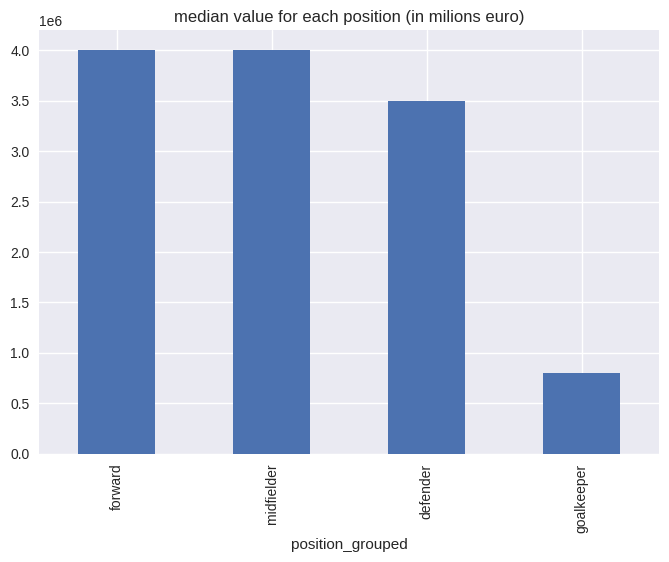

In [314]:
position_md_price2 = (df.groupby(['position_grouped'])['tf_value_eur'].median()).sort_values(ascending=False)
position_md_price2.plot(kind="bar")
plt.title("median value for each position (in milions euro)")
plt.show()

It appears that the item may be useful for modelling.

## League

Let's look at another categorical variable - league.

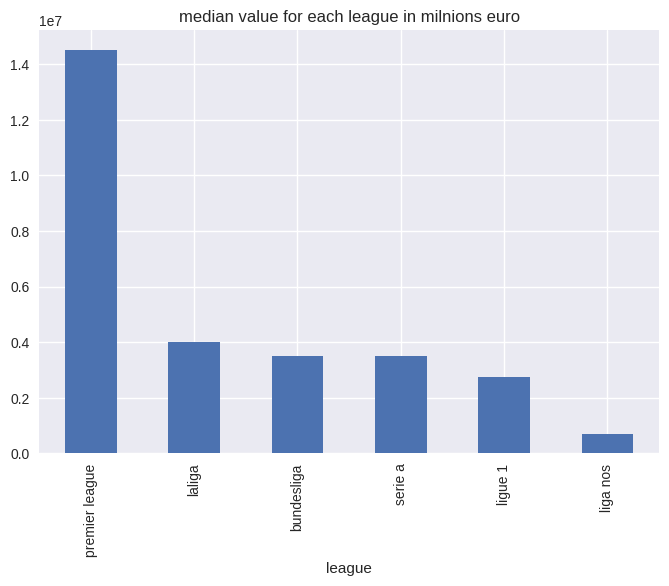

In [315]:
league_md_price = df.groupby(['league'])['tf_value_eur'].median().sort_values(ascending=False)
league_md_price.plot(kind="bar")
plt.title("median value for each league in milnions euro")
plt.show()

We can see the disparity of values depending on the league.
<br>The Premier League has the most expensive football players, as indicated by the median.
<br> I might use this variable in the model.

## ws_columns

Let's examine the variables from the "who_scored" dataset. To start with, let's check how many instances have missing data (excluding null values).

In [316]:
ws_col = ["ws_assists", "ws_goals", "ws_MotM", "duels_won_per_game", "ws_average_rating", "ws_pass_effectivenes", "ws_appearances", "ws_minutes"]
for col in ws_col:
  a = ((df[col] == "-").sum()) / (df[col].count()) * 100
  print("{:.2f}% of players have no value in {} column".format(a, col))

63.31% of players have no value in ws_assists column
59.90% of players have no value in ws_goals column
75.36% of players have no value in ws_MotM column
11.09% of players have no value in duels_won_per_game column
0.00% of players have no value in ws_average_rating column
0.83% of players have no value in ws_pass_effectivenes column
0.00% of players have no value in ws_appearances column
0.00% of players have no value in ws_minutes column


As you can see above, a large % of players have no goals, assists and Man of the Match.

### average ws rating

Let's take a look at the 'ws_average_rating' variable.

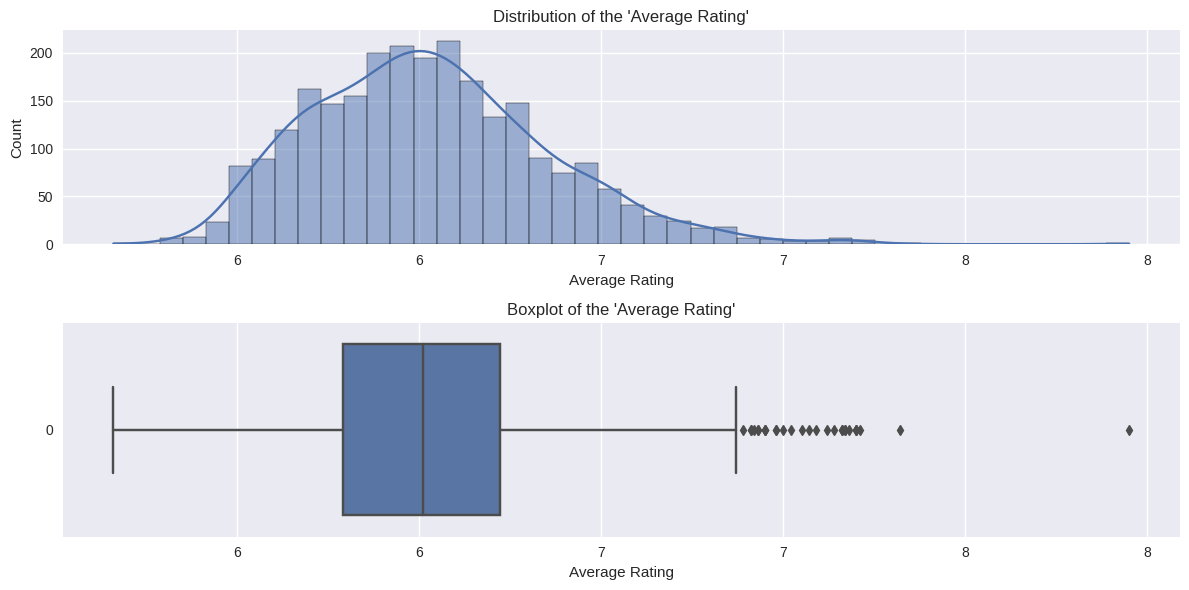

skewness: 0.61
kurtosis: 0.73


count   2,524.00
mean        6.53
std         0.33
min         5.66
25%         6.29
50%         6.51
75%         6.72
max         8.45
Name: ws_average_rating, dtype: float64

In [317]:
plots_stats(df["ws_average_rating"], "Average Rating")

A distribution close to normal, as can be seen in the graph and in the skewness and kurtosis values. The tail on the right side is slightly longer. A kurtosis value of 0.73 suggests that the distribution has a slightly higher and more rounded peak compared to a normal distribution, although it's not extremely peaked or flat. Overall, the data seems to have a slightly asymmetric shape and a moderate concentration around the mean value.

In [318]:
nans = df["ws_average_rating"].isna().sum()/len(df["ws_average_rating"])*100
print(f"There is {nans:.2f}% of nan values in average_ws_rating variable")

There is 18.87% of nan values in average_ws_rating variable


Let's modify the function that displays the relationship between a selected variable and a value. The function will not consider null values.

In [319]:
def drop_na_plot_scatter_with_line(df, x_variable, y_variable):
    df_filtered = df.dropna(subset=[x_variable, y_variable])

    z = np.polyfit(df_filtered[x_variable], df_filtered[y_variable], 1)
    p = np.poly1d(z)

    plt.scatter(df_filtered[x_variable], df_filtered[y_variable], alpha=0.3)
    plt.plot(df_filtered[x_variable], p(df_filtered[x_variable]))

    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title("'{}' vs '{}'".format(x_variable, y_variable))

    correlation = stats.pearsonr(df_filtered[y_variable], df_filtered[x_variable])
    print(("\033[1mPearson's\033[0m correlation coefficient between \033[1m{}\033[0m and \033[1m{}\033[0m is \033[1m{:.4f}\033[0m and \033[1mp-value {:.2f}\033[0m."
           ).format(x_variable, y_variable, correlation[0], correlation[1]))

    plt.show()

Pearson's correlation coefficient between ws_average_rating and value_log is 0.4437 and p-value 0.00.


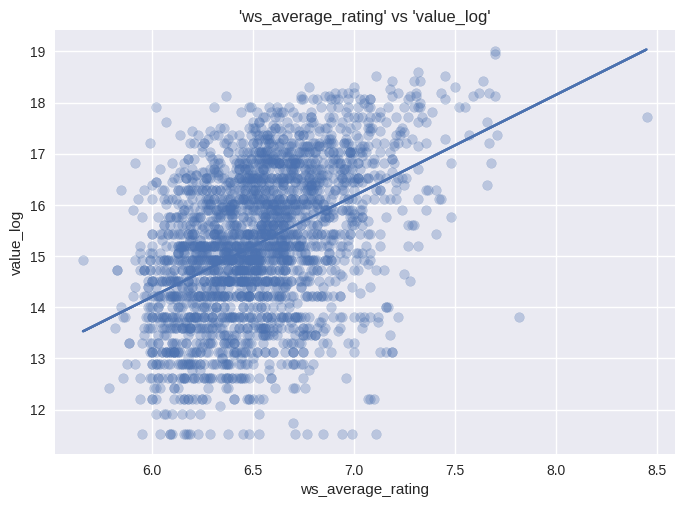

In [320]:
drop_na_plot_scatter_with_line(df, 'ws_average_rating', 'value_log')

If we do not take nulls into account then Pearson's correlation of average rating with value_log is 0.44.
<br>I will fill in nans with the median rating at a given club in a given position <br>
let's check for missing data according to the above reasoning (median for position)

In [321]:
median_by_pos = df.groupby(["club", "position"])["ws_average_rating"].median()
median_by_pos.isnull().any()

True

Unfortunately, I cannot complete the nulls using the club and position.
<br> Let's check by grouped position.

In [322]:
median_by_pos = df.groupby(["club", "position_grouped"])["ws_average_rating"].median()
median_by_pos.isnull().any()

False

I can fill nans with median for grouped_position in given club

In [323]:
df['ws_average_rating_fixed'] = df['ws_average_rating'].fillna(df.groupby(["club", "position_grouped"])['ws_average_rating'].transform('median'))

In [324]:
df['ws_average_rating_fixed'].isnull().any()

False

Pearson's correlation coefficient between ws_average_rating_fixed and value_log is 0.3248 and p-value 0.00.


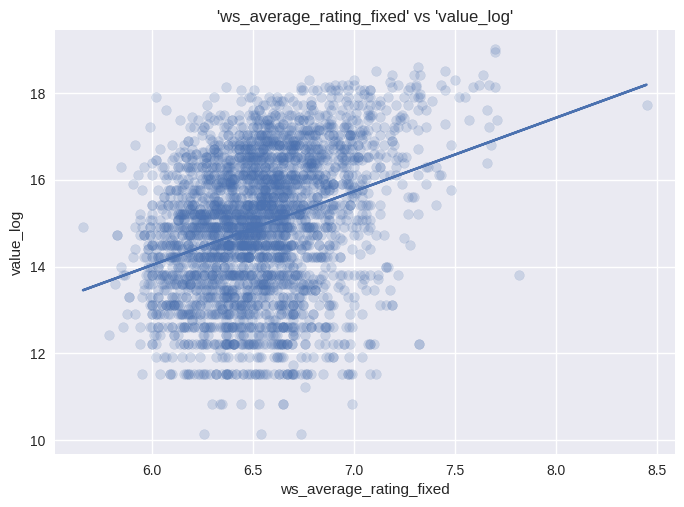

In [325]:
plot_scatter_with_line(df, 'ws_average_rating_fixed', 'value_log')


It appears that by filling the nans with the median, Pearson's correlation drops from 0.44 to 0.32

I don't know if it's a good idea to fill in missing data for this feature. In many cases, a player may not have an average rating because he hasn't played a match (in the who_scored set, players without a match played are simply absent). Half of the nulls are due to the fact that the player has not played any matches and thus has no average rating. The other half of the nulls are due to the lack of a match between the two sets. (I know this because when combining the data, 289 rows from who_scored did not find a match in transfermarkt, the other way it was 615 rows) <br> <br>
So I should probably either remove the rows with missing data (I will lose about 19% of the data) or I should not use the average score feature. I will check first how the situation is with other variables.


Another idea is to prepare two sets of data. One with filled nans and one with nans removed

I will fill nans with average from the whole set to see what it does

In [326]:
df['ws_average_rating_fixed2'] = df['ws_average_rating'].fillna(df['ws_average_rating'].mean())
df['ws_average_rating_fixed2'].isnull().any()

False

Pearson's correlation coefficient between ws_average_rating_fixed2 and value_log is 0.3612 and p-value 0.00.


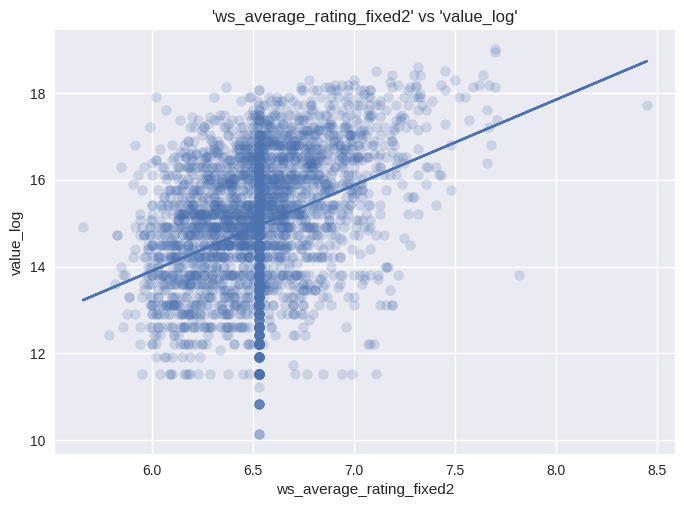

In [327]:
plot_scatter_with_line(df, 'ws_average_rating_fixed2', 'value_log')


It's hard to say which method is better.

### minutes played

Let's take a look at the minutes played.

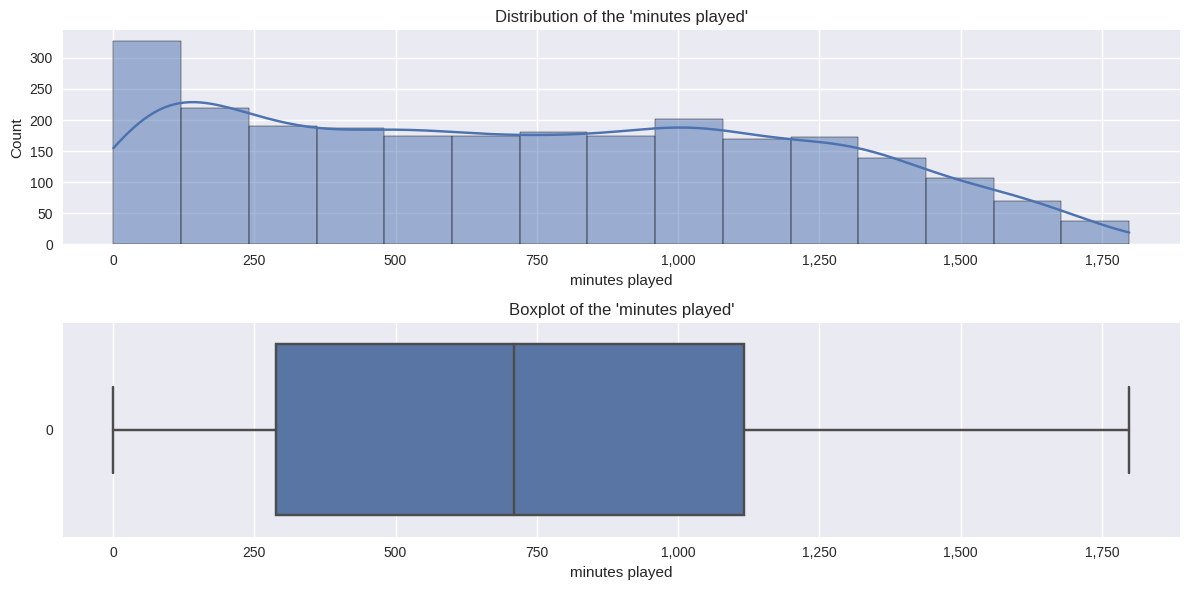

skewness: 0.18
kurtosis: -1.11


count   2,524.00
mean      727.96
std       481.87
min         1.00
25%       289.00
50%       710.50
75%     1,116.00
max     1,798.00
Name: ws_minutes, dtype: float64

In [328]:
plots_stats(df["ws_minutes"], "minutes played")

A skewness value of 0.18 indicates a relatively symmetrical distribution, with a slight tendency towards the right tail. The kurtosis value of -1.11 suggests that the distribution is less peaked than a normal distribution and has thinner tails, resulting in a relatively flat appearance. This suggests that the data is more dispersed compared to a normal distribution, with fewer extreme values.

Pearson's correlation coefficient between ws_minutes and value_log is 0.3976 and p-value 0.00.


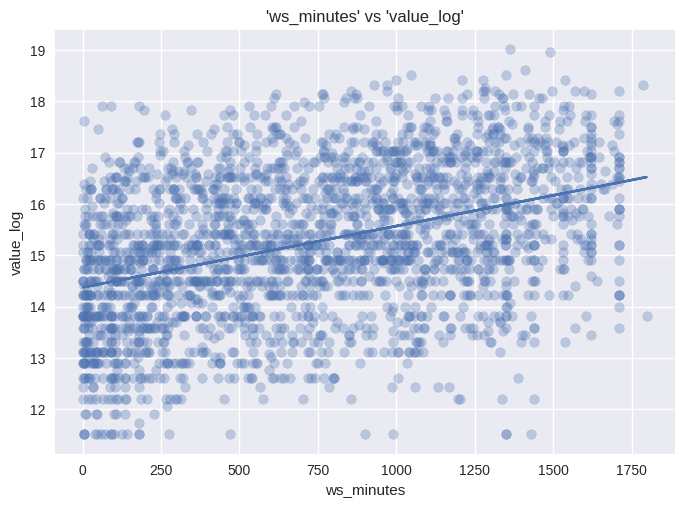

In [329]:
drop_na_plot_scatter_with_line(df, 'ws_minutes', 'value_log')

A correlation of 0.39 with the price is visible (Pearson's correlation coefficient). <br> Perhaps I will use this variable.


###Appearances

"Let's take a closer look at the appearances."

In [330]:
df["ws_appearances"].head()

0    17(1)
1     8(1)
2       18
3     7(7)
4     5(1)
Name: ws_appearances, dtype: object

It appears that this column includes both appearances from the beginning of the match and appearances from the bench.
<br>
Let's split this into two columns.

In [331]:
df["ws_appearances_bench"] = df["ws_appearances"].str.replace(')','').str.partition('(')[2]
df["ws_appearances_starter"] = df["ws_appearances"].str.replace(')','').str.partition('(')[0].astype(float)

There were problems with setting the type as float

In [332]:
def convert_float(val):
    try:
        return float(val)
    except ValueError:
        return 0

df["ws_appearances_bench"] = df.ws_appearances_bench.apply(lambda x: convert_float(x))

In [333]:
df = df.drop([ 'ws_appearances' ], axis = 1)

Let's create column that sums appearences from the start and from the bench

In [334]:
df["ws_appearances_sum"] = df["ws_appearances_bench"] + df["ws_appearances_starter"]

df["ws_appearances_sum"].isna().sum()

587

Let's look at the distribution of appearances.

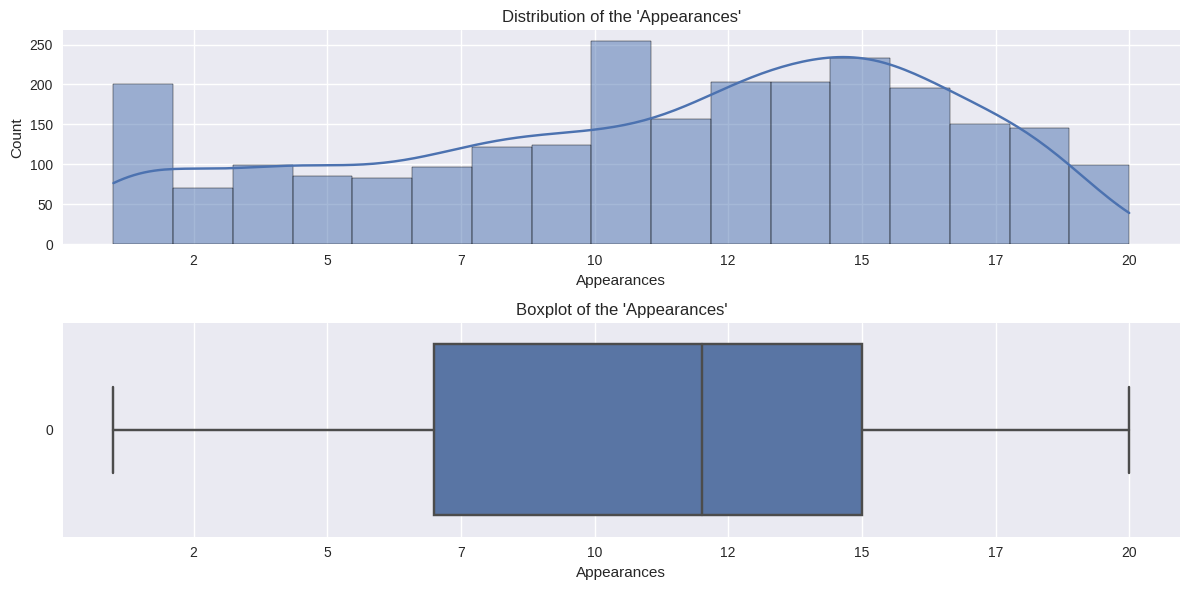

skewness: -0.44
kurtosis: -0.88


count   2,524.00
mean       11.23
std         5.13
min         1.00
25%         7.00
50%        12.00
75%        15.00
max        20.00
Name: ws_appearances_sum, dtype: float64

In [335]:
plots_stats(df["ws_appearances_sum"], "Appearances")

The skewness value of -0.44 reveals a distribution that is slightly negatively skewed, indicating that the tail on the left side is slightly longer than the right side. The kurtosis value of -0.88 suggests a distribution that is platykurtic, meaning it has thinner tails and is less peaked than a normal distribution. This indicates that the data has a more moderate range of values and lacks extreme outliers.

Pearson's correlation coefficient between ws_appearances_sum and value_log is 0.4087 and p-value 0.00.


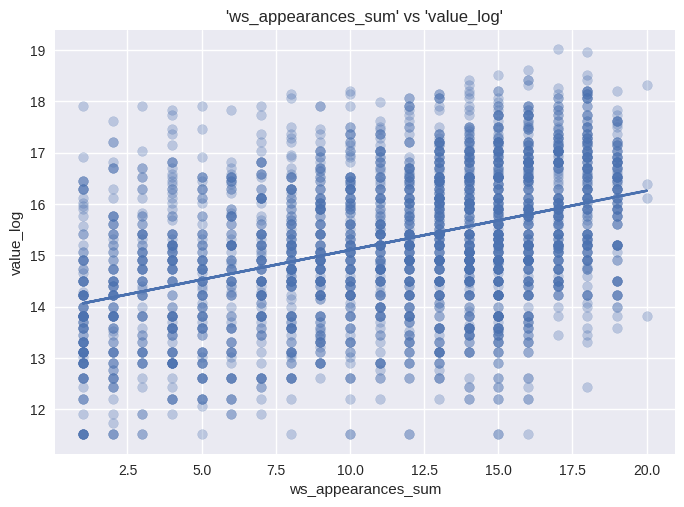

In [336]:
drop_na_plot_scatter_with_line(df, 'ws_appearances_sum', 'value_log')

Pearson's correlation coefficient between ws_appearances_starter and value_log is 0.3945 and p-value 0.00.


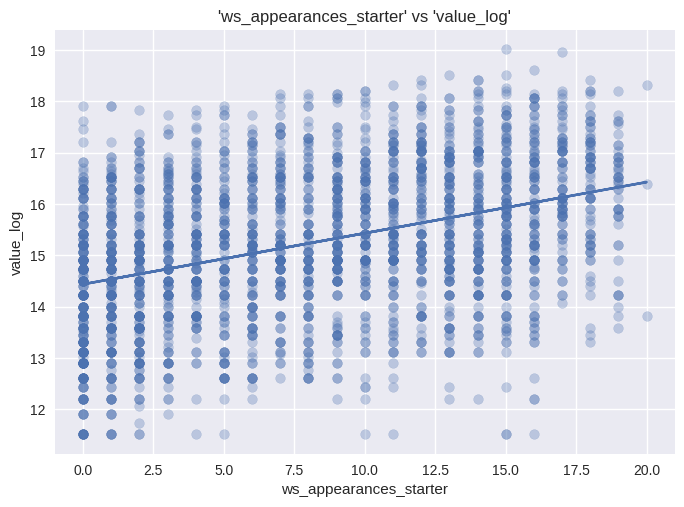

In [337]:
drop_na_plot_scatter_with_line(df, 'ws_appearances_starter', 'value_log')

Performances (both from the start and total appearances) are related to value at a similar level to the number of minutes played.

### Goals scored

Let's take a look at the goals.
Let's fix the variable first.

In [338]:
df['ws_goals_fixed'] = df['ws_goals'].replace('-', 0)
df['ws_goals_fixed'] = df['ws_goals_fixed'].fillna("0")
df['ws_goals_fixed'] = df['ws_goals_fixed'].astype(int)

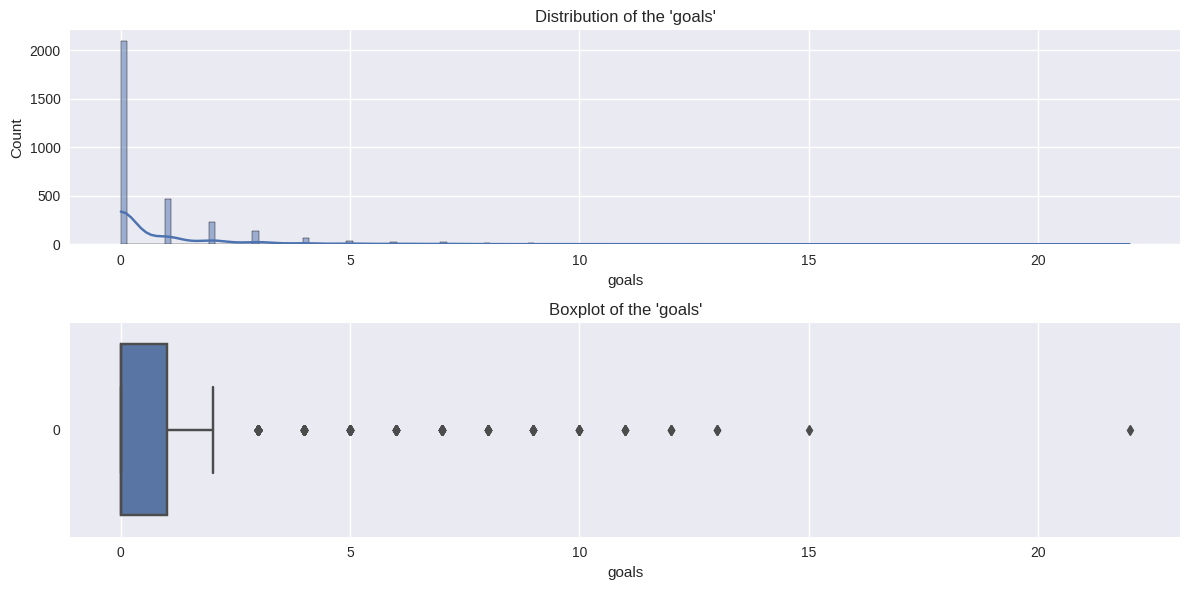

skewness: 3.75
kurtosis: 20.71


count   3,111.00
mean        0.80
std         1.70
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        22.00
Name: ws_goals_fixed, dtype: float64

In [339]:
plots_stats(df["ws_goals_fixed"], "goals")

From the graph and from the skewness value of 3.75 distribution is highly positively skewed, where the tail on the right side is much longer than the left side. The kurtosis value of 20.71 suggests a distribution with heavy tails and a sharp peak, indicative of a leptokurtic distribution. This suggests the presence of outliers or extreme values in the data.

Pearson's correlation coefficient between ws_goals_fixed and value_log is 0.3612 and p-value 0.00.


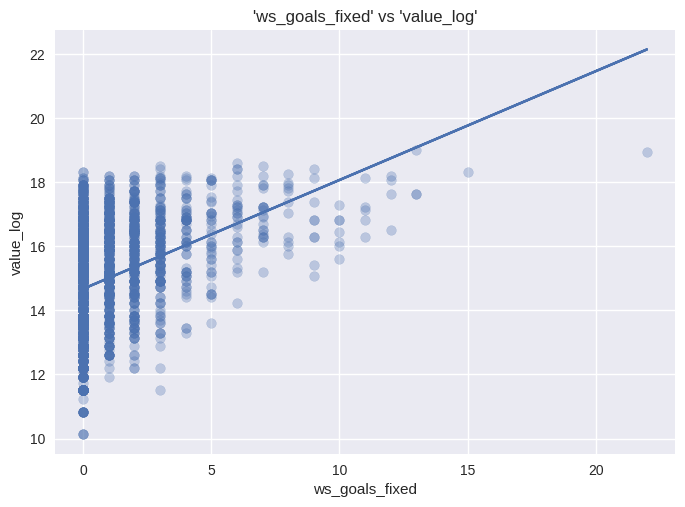

In [340]:
drop_na_plot_scatter_with_line(df, 'ws_goals_fixed', 'value_log')

The correlation is moderate. Probably not a valuable variable in the context of modelling. Moreover, the goals scored will heavily favour offensive players.

##fifa_attributes

Let's put together columns from fifa.

In [341]:
sf_col = ['OVA', 'POT', 'ATTACKING', 'SKILL', 'MOVEMENT', 'POWER', 'MENTALITY', 'DEFENDING',
          'TOTAL', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

Let's see how the fifa's features are distributed.

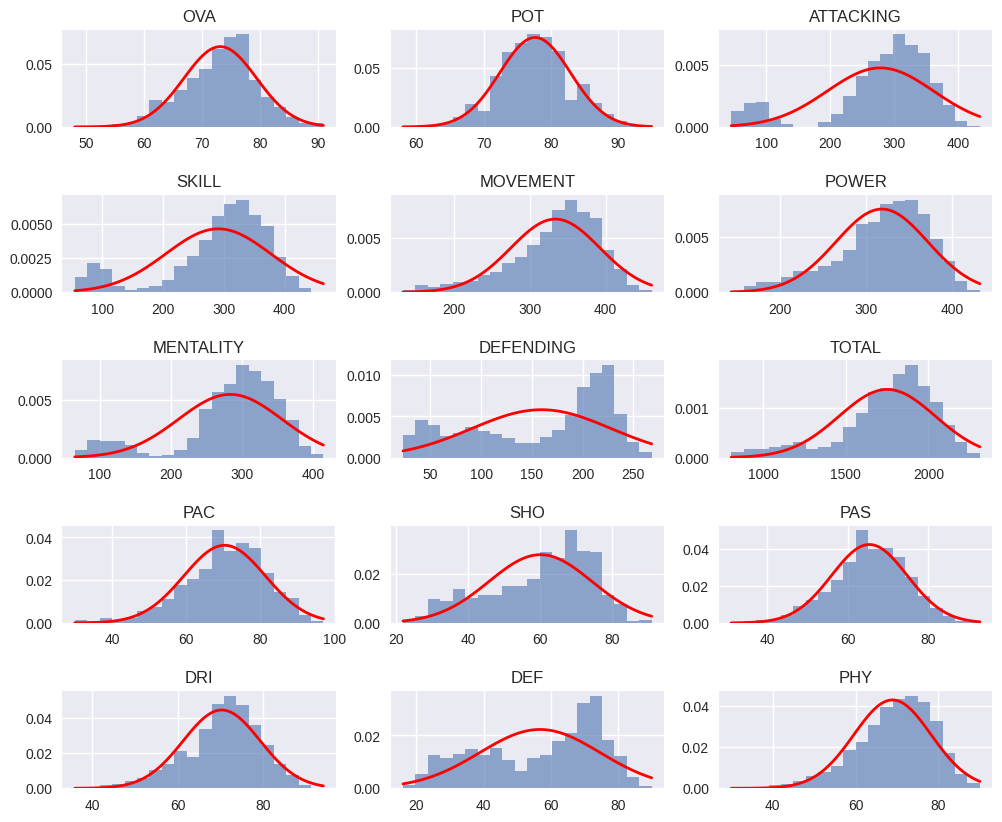

In [342]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
n = 1

for col in sf_col:
    plt.subplot(6, 3, n)
    n = n + 1

    # Check for non-finite values (NaN or Inf) and remove them
    data = df[col].values
    data = data[np.isfinite(data)]

    # Plot the histogram for each column
    plt.hist(data, bins=20, density=True, alpha=0.6)

    if len(data) > 0:  # Check if there are still valid data points
        # Fit a normal distribution to the data for each column
        mu, std = norm.fit(data)

        # Generate data for the normal distribution line
        x = np.linspace(data.min(), data.max(), 100)
        p = norm.pdf(x, mu, std)

        # Plot the PDF line
        plt.plot(x, p, 'r', linewidth=2)

    plt.title(col)

plt.subplots_adjust(hspace=0.7)

plt.show()


Some variables like POT, MOVEMENT, POWER, PAC, PAS, DRI, PHY and OVA have distributions similar to normal. Other variables like MENTALITY, DEFENDING and DEF have other non-normal distributions.

Let's take a look at Pearson's correlation coefficient with log_value vs values from fifa

In [343]:
for col in sf_col:
    print(("Pearson correlation coefficient between " + col +
           " and log_value is {0[0]: .4f} and p-value {0[1]: .4f}."
           ).format(stats.pearsonr(df[-df[col].isna()][col],df[-df[col].isna()]["value_log"])))


Pearson correlation coefficient between OVA and log_value is  0.8010 and p-value  0.0000.
Pearson correlation coefficient between POT and log_value is  0.7916 and p-value  0.0000.
Pearson correlation coefficient between ATTACKING and log_value is  0.4582 and p-value  0.0000.
Pearson correlation coefficient between SKILL and log_value is  0.4609 and p-value  0.0000.
Pearson correlation coefficient between MOVEMENT and log_value is  0.4967 and p-value  0.0000.
Pearson correlation coefficient between POWER and log_value is  0.5221 and p-value  0.0000.
Pearson correlation coefficient between MENTALITY and log_value is  0.4853 and p-value  0.0000.
Pearson correlation coefficient between DEFENDING and log_value is  0.2715 and p-value  0.0000.
Pearson correlation coefficient between TOTAL and log_value is  0.5750 and p-value  0.0000.
Pearson correlation coefficient between PAC and log_value is  0.3563 and p-value  0.0000.
Pearson correlation coefficient between SHO and log_value is  0.2777 an

The highest Pearson correlation wit log_value have: <br>
 - OVA, POT (~0.8) <br>
 - TOT (0.57) <br>
 - POWER, DRI, PAS, MOVEMENT (~0.5)

Let's see how the fifa variables are correlated with each other

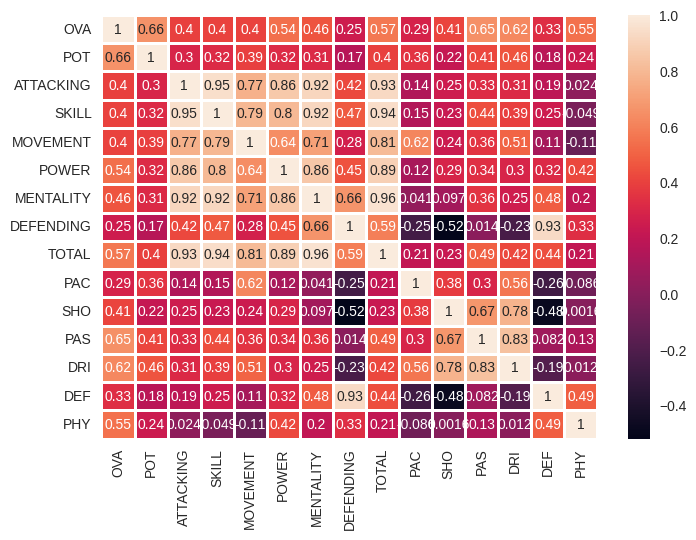

In [344]:
f, ax = plt.subplots()
sns.heatmap(df[sf_col].corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

The OVA and POT I plan to use have a moderate positive correlation with each other, so I'll use them both. TOTAL has a strong correlation with many variables, so I have to be careful when I want to use this feature (strong correlation with POWER and MOVEMENT). PAS and DRI are also highly correlated with each other

### OVA

Let's take a closer look at the OVA.

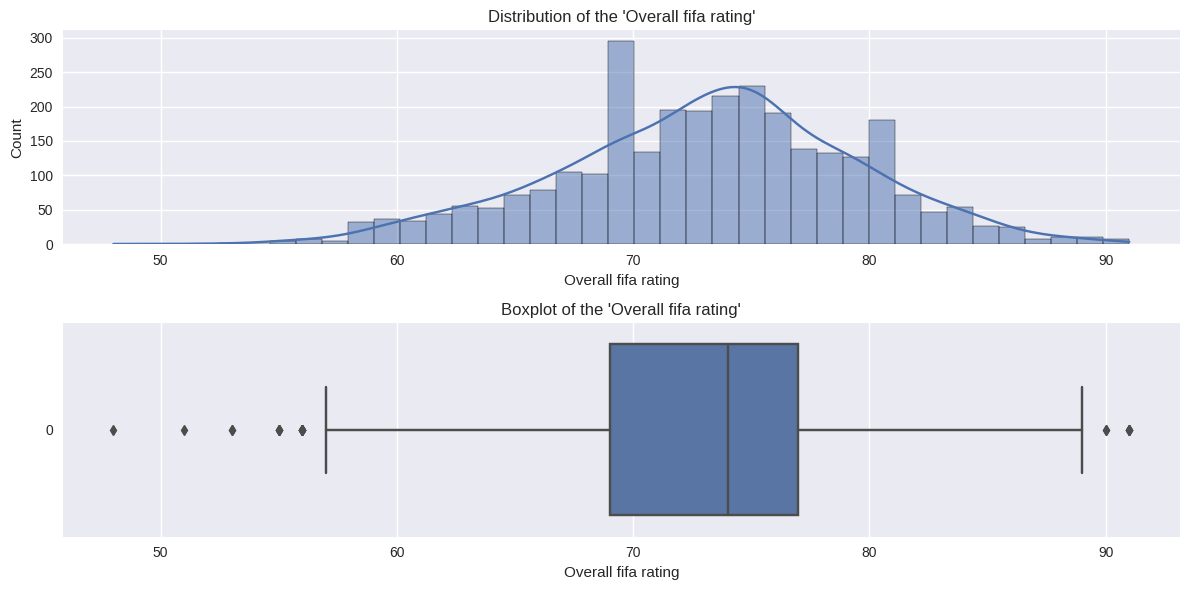

skewness: -0.19
kurtosis: 0.06


count   2,927.00
mean       73.16
std         6.29
min        48.00
25%        69.00
50%        74.00
75%        77.00
max        91.00
Name: OVA, dtype: float64

In [345]:
plots_stats(df["OVA"], "Overall fifa rating")

We can see outliers, but the distribution is close to normal with slightly longer left tail.

Pearson's correlation coefficient between OVA and value_log is 0.8010 and p-value 0.00.


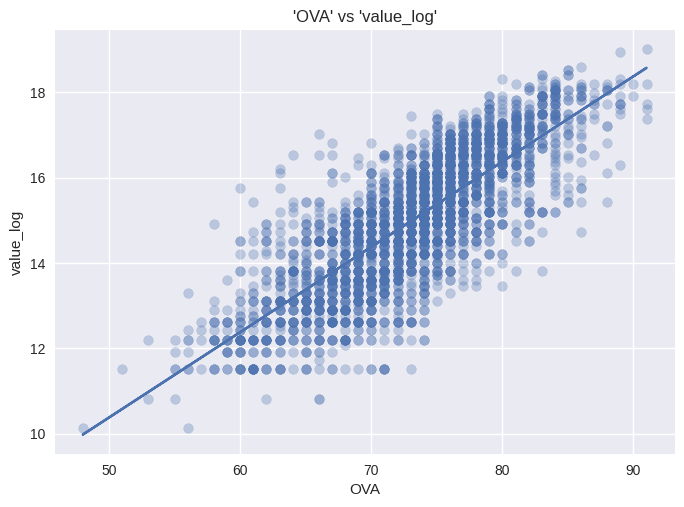

In [346]:
drop_na_plot_scatter_with_line(df, 'OVA', 'value_log')

We can see that OVA is hihgly correlated with log_value. I will use this feature in my model.

I can fill nans with median for grouped_position in given club

In [347]:
df['OVA_fixed'] = df['OVA'].fillna(df.groupby(["club", "position_grouped"])['OVA'].transform('median'))

In [348]:
df['OVA_fixed'].isnull().any()

False

Pearson's correlation coefficient between OVA_fixed and value_log is 0.7759 and p-value 0.00.


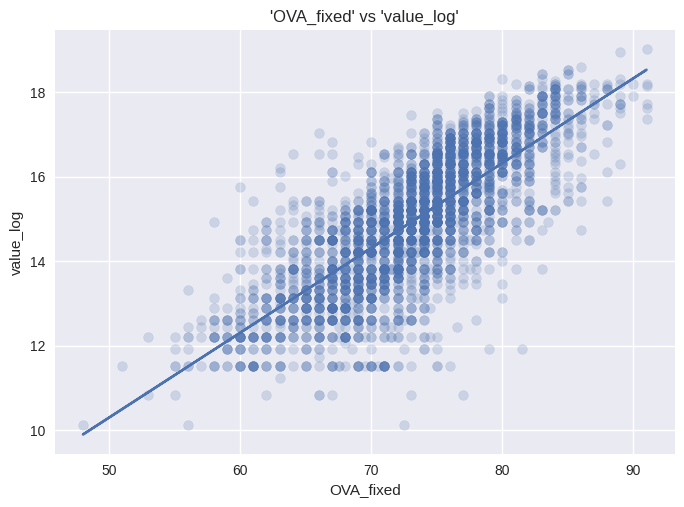

In [349]:
plot_scatter_with_line(df, 'OVA_fixed', 'value_log')


Pearson's correlation dropped by 0.03 after the filling in nulls

### POT

Let's check the distribution of the POT variable and its correlation with the value.

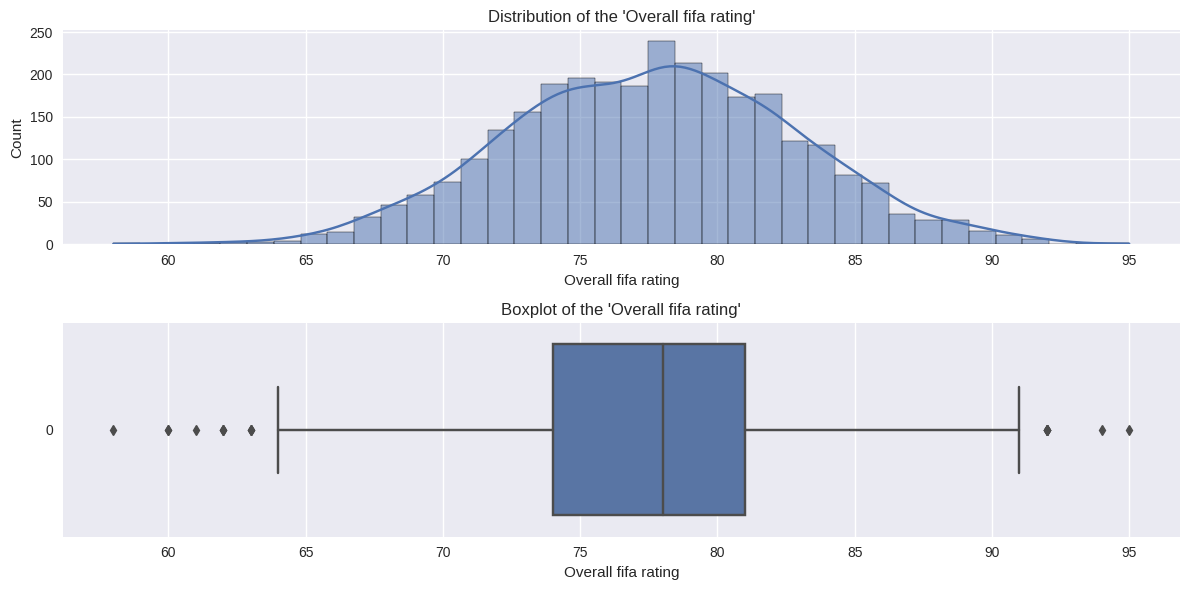

skewness: -0.01
kurtosis: -0.11


count   2,927.00
mean       77.66
std         5.25
min        58.00
25%        74.00
50%        78.00
75%        81.00
max        95.00
Name: POT, dtype: float64

In [350]:
plots_stats(df["POT"], "Overall fifa rating")

Like in OVA We can see outliers, but the distribution is close to normal.

Pearson's correlation coefficient between POT and value_log is 0.7916 and p-value 0.00.


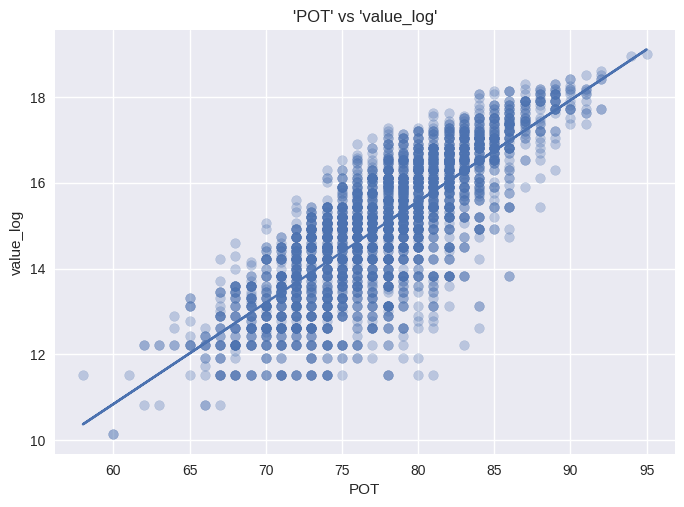

In [351]:
drop_na_plot_scatter_with_line(df, 'POT', 'value_log')

Just like the OVA POT is hihgly correlated with log_value. I will use this feature

I can fill nans with median for grouped_position in given club

In [352]:
df['POT_fixed'] = df['POT'].fillna(df.groupby(["club", "position_grouped"])['POT'].transform('median'))

In [353]:
df['POT_fixed'].isnull().any()

False

Pearson's correlation coefficient between POT_fixed and value_log is 0.7714 and p-value 0.00.


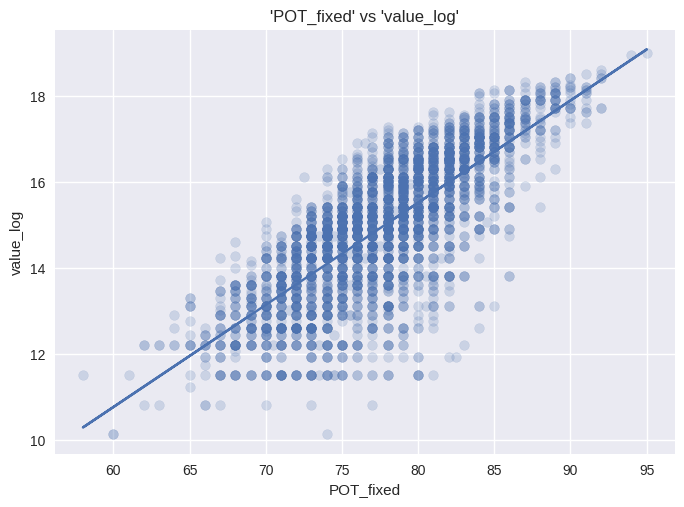

In [354]:
plot_scatter_with_line(df, 'POT_fixed', 'value_log')


Pearson's correlation dropped by 0.03 after the filling in nulls

### TOT

Let's also take a closer look at TOTAL.

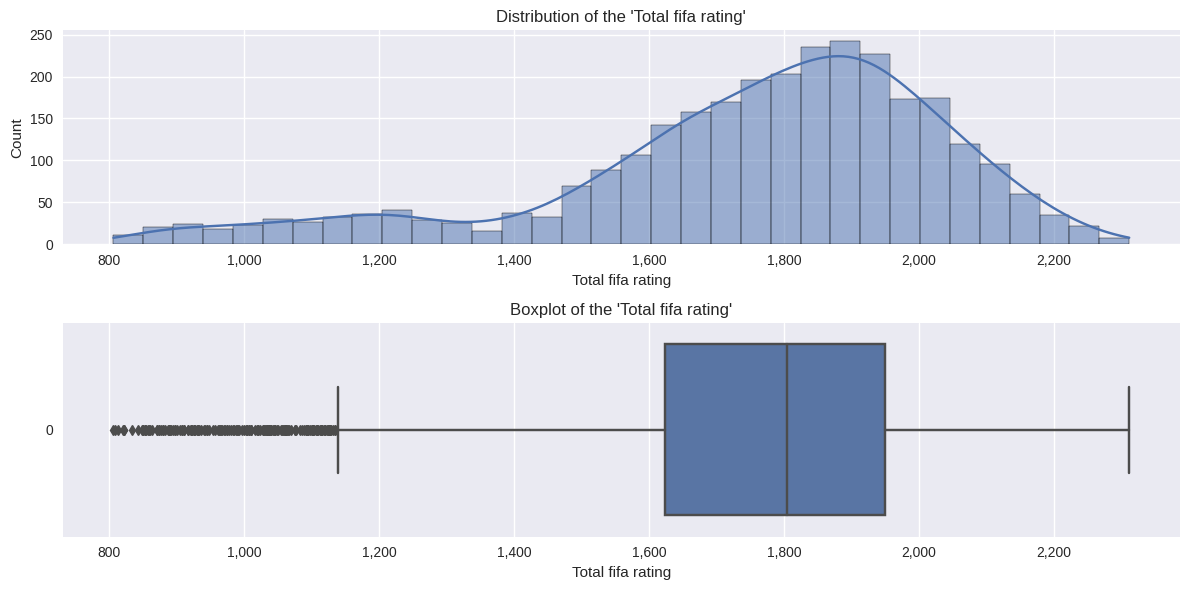

skewness: -1.05
kurtosis: 0.90


count   2,927.00
mean    1,750.65
std       292.26
min       806.00
25%     1,624.00
50%     1,805.00
75%     1,950.00
max     2,312.00
Name: TOTAL, dtype: float64

In [355]:
plots_stats(df["TOTAL"], "Total fifa rating")

The skewness value of -1.05 indicates that the distribution is negatively skewed, meaning it has a long tail on the left side and is skewed towards higher values. The kurtosis value of 0.90 suggests that the distribution has relatively light tails and a peak that is slightly higher and narrower than the peak of a normal distribution. This indicates that the data has fewer outliers and is closer to a normal distribution, but with slightly more weight in the tails.

Pearson's correlation coefficient between TOTAL and value_log is 0.5750 and p-value 0.00.


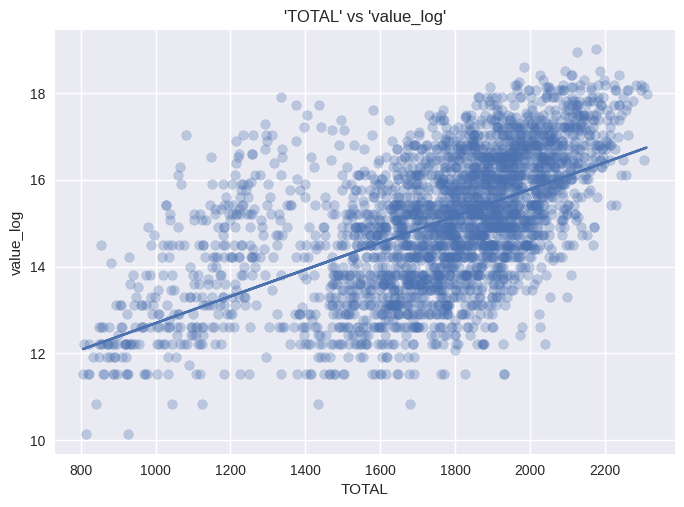

In [356]:
drop_na_plot_scatter_with_line(df, 'TOTAL', 'value_log')

The Pearson correlation coefficient between TOTAL and value_log is 0.57. This variable can be used in modelling.

###fifa data completion

Let's complete all the columns from the sofifa set in the same way as above.

In [357]:
for col in sf_col:
  df[col+'_fixed'] = df[col].fillna(df.groupby(["club", "position_grouped"])[col].transform('median'))
  print(df[col+'_fixed'].isnull().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [358]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
pd.set_option('display.max_rows', None)
print(missing_data)
pd.reset_option('display.max_rows')

                          Total  Percent
duels_won_per_game          587     0.19
ws_assists                  587     0.19
ws_MotM                     587     0.19
ws_goals                    587     0.19
ws_average_rating           587     0.19
ws_minutes                  587     0.19
ws_pass_effectivenes        587     0.19
ws_appearances_bench        587     0.19
ws_appearances_starter      587     0.19
ws_appearances_sum          587     0.19
PAC                         184     0.06
sf_SALARY_EUR               184     0.06
VALUE_EUR                   184     0.06
PHY                         184     0.06
DEF                         184     0.06
PAS                         184     0.06
SHO                         184     0.06
DRI                         184     0.06
TOTAL                       184     0.06
MENTALITY                   184     0.06
POWER                       184     0.06
MOVEMENT                    184     0.06
SKILL                       184     0.06
ATTACKING       

## EDA Summary


The target variable had outliers and no normal distribution; it was log-transformed.
<br>A preliminary analysis of the variables was carried out; for each numeric variable, its distribution and correlation with value_log were checked, so that some of the variables can be rejected immediately; other variables appear to have good predictive value.
<br>NaN values have been filled in.
<br>It is therefore appropriate to move on to modelling

In [359]:
df.to_excel("/content/drive/MyDrive/ColabNotebooks/eda_fifa_df2.xlsx", index=False)